In [550]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


pd.options.plotting.backend = 'matplotlib'

#pd.options.plotting.backend = "plotly"

from sklearn.model_selection import train_test_split

import scipy.stats as stats

from statsmodels.stats import weightstats as stests

from sklearn.feature_selection import RFE

In [551]:
df = pd.read_csv('bb_msd_merged.csv',index_col=0)

In [552]:
df.head()

,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
SpotifyID,,,,,,,,,,,,,,,
58spuRyMUsjKHQHEGwLC99,80s Mercedes,Maren Morris,0.485,0.834,9,1,0.0715,0.0665,0.000,0.2800,0.659,90.933,211767,-5.413,1
6LdR1UYMIqsaaUt0hiWVBN,Dio Nisia,Giorgos Sabanis,0.691,0.762,2,1,0.0285,0.0808,0.000,0.1340,0.529,116.024,248427,-7.321,0
3gQRcZZeBCMGANY1wT2x6A,Hooked On A Feeling (Ooga-Chaka),Baby Talk,0.613,0.678,8,1,0.1060,0.5420,0.000,0.0391,0.911,118.629,181107,-7.850,1
54p39OJ544KF6iFeCzbVjs,Tennessee Rain,Addison Agen,0.553,0.232,9,1,0.0326,0.9070,0.000,0.1230,0.274,137.800,210986,-6.929,1
5JxJQxSxpK3B7ShOV2bz9f,French Touch,Richard Galliano,0.647,0.567,4,0,0.0388,0.4070,0.441,0.1510,0.674,113.256,210720,-10.191,0


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14530 entries, 58spuRyMUsjKHQHEGwLC99 to 0WC05B34BCl3ue6NV0IdU7
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             14530 non-null  object 
 1   Artist            14530 non-null  object 
 2   danceability      14530 non-null  float64
 3   energy            14530 non-null  float64
 4   key               14530 non-null  int64  
 5   mode              14530 non-null  int64  
 6   speechiness       14530 non-null  float64
 7   acousticness      14530 non-null  float64
 8   instrumentalness  14530 non-null  float64
 9   liveness          14530 non-null  float64
 10  valence           14530 non-null  float64
 11  tempo             14530 non-null  float64
 12  duration_ms       14530 non-null  int64  
 13  loudness          14530 non-null  float64
 14  is_hit            14530 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 1.8+ 

In [554]:
df_usable = df.drop(['Track','Artist'],axis=1)

In [555]:
df_usable.tail(56)

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
SpotifyID,,,,,,,,,,,,,
0QV16pno66L6K3fn4W13b7,0.788,0.6890,8,1,0.1300,0.011200,0.000000,0.2200,0.6810,136.045,189230,-7.211,1
2iVtt0mYIL26IGAgRkhHT5,0.618,0.7170,9,1,0.0300,0.016400,0.000339,0.0594,0.7610,114.802,213333,-12.107,1
5lN5aVYeTdA1pZ1JScRtWn,0.374,0.7990,0,1,0.0426,0.752000,0.008350,0.1680,0.8020,161.922,182013,-7.083,0
3hJQ0Bzblzx7JY5rKPvap0,0.789,0.6980,0,1,0.0467,0.023600,0.000000,0.0959,0.4160,123.849,198907,-5.837,1
2nMeu6UenVvwUktBCpLMK9,0.324,0.4160,11,0,0.0368,0.262000,0.000037,0.1100,0.1510,113.986,236053,-8.920,1
7CG8Oz7GD8cTdU9SausPhj,0.559,0.5620,9,1,0.0274,0.006550,0.000000,0.0863,0.6330,111.383,216907,-9.735,1
14Sj7kFWV3xdCVfJ0Ym11J,0.657,0.9070,4,1,0.0274,0.115000,0.000065,0.0387,0.7650,95.998,414013,-4.884,0
3RyuWd7xlLJdLddH6Kt2o6,0.489,0.9550,11,0,0.0363,0.000038,0.000186,0.3340,0.8150,129.352,186173,-2.771,1
6l26mQLF7A4lu9djfIez7O,0.660,0.9910,7,1,0.0550,0.003100,0.000122,0.0610,0.7960,121.467,208560,-5.288,1


#### Separating features and target

In [556]:
y = df_usable['is_hit']

X = df_usable.drop('is_hit',axis=1)

##### Checking target class weight

<AxesSubplot:>

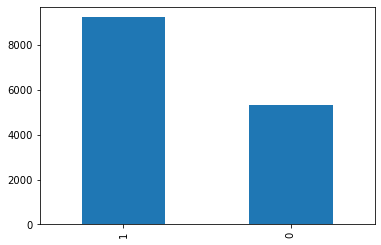

In [557]:
y.value_counts().plot(kind='bar')

#### data is not imbalanced , so no stratification or up and down sampling is needed.

#### Standardizing features

In [558]:
ss= StandardScaler()

In [559]:
Xs = ss.fit_transform(X)

Xs = pd.DataFrame(Xs,columns=X.columns)

##### Train test split using 67:33 ratio of train and test data.

In [560]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=1)

#### Checking dimensions of train and test data

In [561]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9735, 12), (4795, 12), (9735,), (4795,))

**GDA (Gaussian Discriminant Analysis) is a general term for both LDA (Linear Discriminant Analysis)
 and QDA (Quadratic Discriminant Analysis) where the likelihood probability of each observation given the class,
i.e., P(x|y) can be modeled by the multivariate Gaussian distribution.**

##### Linear Discriminant Analysis with all features

In [562]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [563]:
y_pred  = lda.predict(X_test)

In [564]:
y_pred_prob = lda.predict_proba(X_test)[:,1]

In [565]:
y_pred_prob

array([0.4474274 , 0.34471593, 0.82969671, ..., 0.82454464, 0.85926449,
       0.87413975])

In [566]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [567]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59      1747
           1       0.75      0.95      0.84      3048

    accuracy                           0.77      4795
   macro avg       0.79      0.70      0.71      4795
weighted avg       0.78      0.77      0.75      4795



In [568]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 792,  955],
       [ 159, 2889]], dtype=int64)

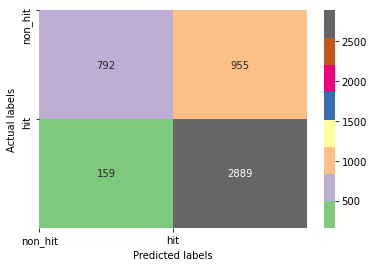

In [569]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [570]:
as1 = accuracy_score(y_test,y_pred)
as1

0.767674661105318

In [571]:
rs1 = roc_auc_score(y_test,y_pred_prob)
rs1

0.7925243424423121

##### Quadratic Discriminant Analysis with all features

In [572]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [573]:
y_pred  = qda.predict(X_test)

In [574]:
y_pred_prob = qda.predict_proba(X_test)[:,1]

In [575]:
y_pred_prob

array([0.1116889 , 0.20083369, 0.99206077, ..., 0.95262773, 0.97915294,
       0.97266957])

In [576]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [577]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.51      0.62      1747
           1       0.77      0.93      0.84      3048

    accuracy                           0.78      4795
   macro avg       0.78      0.72      0.73      4795
weighted avg       0.78      0.78      0.76      4795



In [578]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 889,  858],
       [ 220, 2828]], dtype=int64)

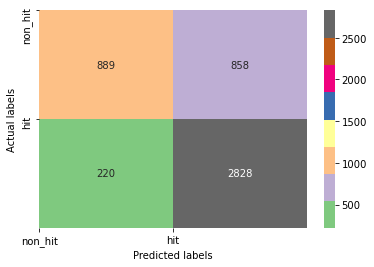

In [579]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [580]:
as2 = accuracy_score(y_test,y_pred)
as2

0.7751824817518248

In [581]:
rs2 = roc_auc_score(y_test,y_pred_prob)
rs2

0.8074160127522698

##### Checking Permutation importance for both lda and qda (Feature Selection)

In [582]:
import eli5
from eli5.sklearn import PermutationImportance

perm1 = PermutationImportance(lda, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm1, feature_names = X_test.columns.tolist())

Weight,Feature
0.0734 ± 0.0026,instrumentalness
0.0423 ± 0.0038,loudness
0.0408 ± 0.0038,acousticness
0.0355 ± 0.0058,danceability
0.0151 ± 0.0056,valence
0.0045 ± 0.0021,liveness
0.0025 ± 0.0030,duration_ms
0.0008 ± 0.0011,tempo
0.0002 ± 0.0006,key
0.0002 ± 0.0027,energy


In [583]:
import eli5
from eli5.sklearn import PermutationImportance

perm2 = PermutationImportance(qda, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm2, feature_names = X_test.columns.tolist())

Weight,Feature
0.0669 ± 0.0046,instrumentalness
0.0448 ± 0.0077,acousticness
0.0370 ± 0.0021,loudness
0.0297 ± 0.0043,energy
0.0284 ± 0.0033,duration_ms
0.0129 ± 0.0017,danceability
0.0099 ± 0.0041,valence
0.0095 ± 0.0029,liveness
0.0015 ± 0.0006,key
0.0004 ± 0.0034,speechiness


In [584]:
lda_feat = ['instrumentalness','loudness','acousticness','danceability','valence']
qda_feat = ['instrumentalness','acousticness','loudness','energy','duration_ms','valence','danceability','liveness']


##### Linear Discriminant Analysis with important features

In [585]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train[lda_feat], y_train)

LinearDiscriminantAnalysis()

In [586]:
y_pred  = lda.predict(X_test[lda_feat])

In [587]:
y_pred_prob = lda.predict_proba(X_test[lda_feat])[:,1]

In [588]:
y_pred_prob

array([0.46010388, 0.35874696, 0.79131417, ..., 0.86931273, 0.84939909,
       0.9190796 ])

In [589]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [590]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58      1747
           1       0.75      0.95      0.84      3048

    accuracy                           0.76      4795
   macro avg       0.79      0.70      0.71      4795
weighted avg       0.78      0.76      0.74      4795



In [591]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 775,  972],
       [ 158, 2890]], dtype=int64)

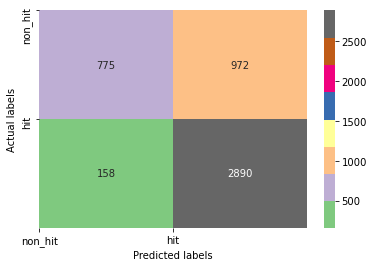

In [592]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [593]:
as3 = accuracy_score(y_test,y_pred)
as3

0.7643378519290928

In [594]:
rs3 = roc_auc_score(y_test,y_pred_prob)
rs3

0.783975003267694

##### Quadratic Discriminant Analysis with important features

In [595]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train[qda_feat], y_train)

QuadraticDiscriminantAnalysis()

In [596]:
X_train[qda_feat]

,instrumentalness,acousticness,loudness,energy,duration_ms,valence,danceability,liveness
4465,-0.354654,-0.820921,1.019403,1.346725,0.540929,-0.631497,0.022882,-0.540537
8772,-0.354685,-0.611377,0.167497,0.630738,-0.008178,1.461530,0.874242,-0.656667
11794,-0.354685,-0.591799,-0.091024,0.193708,-0.138051,1.293596,0.742341,-0.589465
9326,-0.353448,-0.455110,0.791369,1.165404,1.035257,-0.287438,-1.344090,-0.375478
6184,-0.354685,-0.773696,1.150275,1.146807,-0.289954,0.597286,0.952183,-0.741555
...,...,...,...,...,...,...,...,...
905,-0.352311,-0.316285,-0.109118,0.375029,-0.262054,-0.303822,-0.726554,-0.540537
5192,-0.354090,1.335378,-0.036742,-0.898870,0.459934,-1.508029,-1.068298,0.467499
12172,0.078810,-0.740947,0.583163,1.039874,-0.309593,-0.713416,-0.906419,-0.552327
235,-0.351903,-0.394597,-0.839571,-0.940713,-0.302339,1.285404,0.190756,-0.749218


In [597]:
y_pred  = qda.predict(X_test[qda_feat])

In [598]:
y_pred_prob = qda.predict_proba(X_test[qda_feat])[:,1]

In [599]:
y_pred_prob

array([0.09561224, 0.16069606, 0.98693506, ..., 0.96690818, 0.9444225 ,
       0.9918505 ])

In [600]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [601]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63      1747
           1       0.77      0.93      0.84      3048

    accuracy                           0.78      4795
   macro avg       0.79      0.72      0.74      4795
weighted avg       0.78      0.78      0.76      4795



In [602]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 900,  847],
       [ 214, 2834]], dtype=int64)

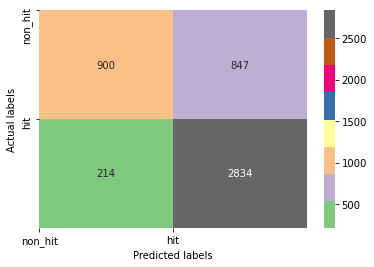

In [603]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [604]:
as4 = accuracy_score(y_test,y_pred)
as4

0.7787278415015642

In [605]:
rs4 = roc_auc_score(y_test,y_pred_prob)
rs4

0.8088755827387633

##### Logistic Regression model with all features

In [606]:
from sklearn.linear_model import LogisticRegression

In [607]:
lr = LogisticRegression(random_state=1)

lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [608]:
y_pred  = lr.predict(X_test)

In [609]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [610]:
y_pred_prob

array([0.42368358, 0.2456046 , 0.81676436, ..., 0.82091926, 0.87007711,
       0.88021002])

In [611]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [612]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1747
           1       0.77      0.92      0.84      3048

    accuracy                           0.77      4795
   macro avg       0.77      0.71      0.73      4795
weighted avg       0.77      0.77      0.76      4795



In [613]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 894,  853],
       [ 251, 2797]], dtype=int64)

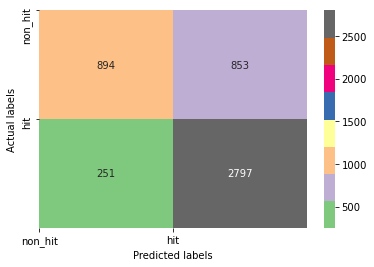

In [614]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [615]:
as5 = accuracy_score(y_test,y_pred)
as5

0.7697601668404588

In [616]:
rs5 = roc_auc_score(y_test,y_pred_prob)
rs5

0.7962198414379655

##### GridSearchCV for identifying Best number of Features to Select using RFE 

In [617]:
X_train.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
4465,0.022882,1.346725,-0.921705,0.693644,-0.537078,-0.820921,-0.354654,-0.540537,-0.631497,-0.324598,0.540929,1.019403
8772,0.874242,0.630738,-1.202039,0.693644,-0.557142,-0.611377,-0.354685,-0.656667,1.461530,-0.019946,-0.008178,0.167497
11794,0.742341,0.193708,-1.482373,0.693644,-0.603378,-0.591799,-0.354685,-0.589465,1.293596,-0.833724,-0.138051,-0.091024
9326,-1.344090,1.165404,0.479963,0.693644,-0.383540,-0.455110,-0.353448,-0.375478,-0.287438,-0.169325,1.035257,0.791369
6184,0.952183,1.146807,1.320964,-1.441662,0.747929,-0.773696,-0.354685,-0.741555,0.597286,-0.858911,-0.289954,1.150275


In [618]:
from sklearn.model_selection import GridSearchCV

lor = LogisticRegression(random_state=1)
rfe = RFE(lor)

params = [{'n_features_to_select': list(range(1, 13))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2', cv=3, return_train_score=True)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RFE(estimator=LogisticRegression(random_state=1)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]}],
             return_train_score=True, scoring='r2')

In [619]:
gsearch.best_params_

{'n_features_to_select': 9}

In [620]:
pd.DataFrame(gsearch.cv_results_).iloc[:,4:].head(3)

,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1,{'n_features_to_select': 1},-0.195959,-0.269045,-0.273032,-0.246012,0.035430,12,-0.269045,-0.235160,-0.232502,-0.245569,0.016636
1,2,{'n_features_to_select': 2},-0.117557,-0.141476,-0.209247,-0.156093,0.038833,11,-0.171375,-0.156093,-0.121543,-0.149671,0.020844
2,3,{'n_features_to_select': 3},-0.064403,-0.076363,-0.140147,-0.093638,0.033248,10,-0.114235,-0.106262,-0.071712,-0.097403,0.018456


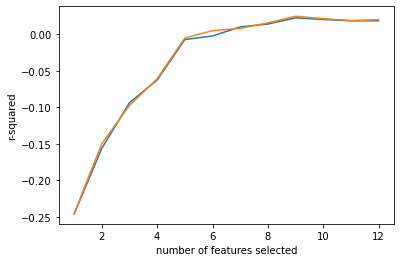

In [621]:
cvr = pd.DataFrame(gsearch.cv_results_).iloc[:,4:]

plt.plot(cvr['param_n_features_to_select'], cvr['mean_test_score'])
plt.plot(cvr['param_n_features_to_select'], cvr['mean_train_score'])
plt.xlabel('number of features selected')
plt.ylabel('r-squared')
plt.show()

In [622]:
lor = LogisticRegression(random_state=1)
rfe = RFE(lor, n_features_to_select=9)
rfe.fit(X_train, y_train)

rf = pd.DataFrame(rfe.ranking_, index=X.columns, columns=['rank'])
rf.sort_values(by='rank')

,rank
danceability,1
energy,1
speechiness,1
acousticness,1
instrumentalness,1
liveness,1
valence,1
duration_ms,1
loudness,1
tempo,2


In [623]:
lr_feat = list(rf.index[rf['rank']==1])
lr_feat

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'duration_ms',
 'loudness']

##### Logistic Regression model with selective features

In [624]:
lr = LogisticRegression(random_state=1)

lr.fit(X_train[lr_feat], y_train)

LogisticRegression(random_state=1)

In [625]:
y_pred  = lr.predict(X_test[lr_feat])

In [626]:
y_pred_prob = lr.predict_proba(X_test[lr_feat])[:,1]

In [627]:
y_pred_prob

array([0.42798361, 0.25248847, 0.80593004, ..., 0.81416472, 0.8673921 ,
       0.86869734])

In [628]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [629]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1747
           1       0.77      0.92      0.84      3048

    accuracy                           0.77      4795
   macro avg       0.77      0.71      0.73      4795
weighted avg       0.77      0.77      0.76      4795



In [630]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 893,  854],
       [ 250, 2798]], dtype=int64)

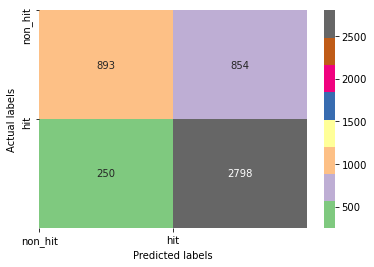

In [631]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [632]:
as6 = accuracy_score(y_test,y_pred)
as6

0.7697601668404588

In [633]:
rs6 = roc_auc_score(y_test,y_pred_prob)
rs6

0.795589589652753

#### Logistic Regression with feature selection based on lasso and DT based Feature Importance 

In [634]:
df=pd.read_csv('bb_msd_merged.csv')
df.head()

,SpotifyID,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
0,58spuRyMUsjKHQHEGwLC99,80s Mercedes,Maren Morris,0.485,0.834,9,1,0.0715,0.0665,0.000,0.2800,0.659,90.933,211767,-5.413,1
1,6LdR1UYMIqsaaUt0hiWVBN,Dio Nisia,Giorgos Sabanis,0.691,0.762,2,1,0.0285,0.0808,0.000,0.1340,0.529,116.024,248427,-7.321,0
2,3gQRcZZeBCMGANY1wT2x6A,Hooked On A Feeling (Ooga-Chaka),Baby Talk,0.613,0.678,8,1,0.1060,0.5420,0.000,0.0391,0.911,118.629,181107,-7.850,1
3,54p39OJ544KF6iFeCzbVjs,Tennessee Rain,Addison Agen,0.553,0.232,9,1,0.0326,0.9070,0.000,0.1230,0.274,137.800,210986,-6.929,1
4,5JxJQxSxpK3B7ShOV2bz9f,French Touch,Richard Galliano,0.647,0.567,4,0,0.0388,0.4070,0.441,0.1510,0.674,113.256,210720,-10.191,0


In [635]:
df.drop(columns=['SpotifyID','Track','Artist'],inplace=True)

In [636]:
df.head(2)

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
0,0.485,0.834,9,1,0.0715,0.0665,0.0,0.280,0.659,90.933,211767,-5.413,1
1,0.691,0.762,2,1,0.0285,0.0808,0.0,0.134,0.529,116.024,248427,-7.321,0


In [637]:
X=df.drop('is_hit',axis=1)
y=df['is_hit']
X.head(2)


,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,0.485,0.834,9,1,0.0715,0.0665,0.0,0.280,0.659,90.933,211767,-5.413
1,0.691,0.762,2,1,0.0285,0.0808,0.0,0.134,0.529,116.024,248427,-7.321


In [638]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)


In [639]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [640]:
X_train[5:]

array([[ 0.71195042,  0.30240338,  0.19724432, ...,  0.90790739,
        -0.0019663 , -0.08212674],
       [-1.2431692 ,  0.78459106,  0.19724432, ..., -1.26531321,
        -0.19151081,  0.8516924 ],
       [-0.17293553,  0.9097744 ,  0.47787688, ..., -0.28337692,
        -0.26124904,  1.23645248],
       ...,
       [ 0.25157057, -0.11951084, -1.48655103, ...,  0.25062629,
         0.49757112,  0.1277424 ],
       [-0.84257894, -1.78398562, -1.48655103, ..., -1.09270408,
        -0.47466084, -0.18533704],
       [-0.65723121,  1.0952312 , -0.08338824, ...,  0.68667031,
        -0.3606491 ,  0.89898685]])

In [641]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [642]:
predictions=clf.predict(X_test)

In [643]:
clf.score(X_test,y_test)

0.7660013764624914

In [644]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 500  522]
 [ 158 1726]]


## Feature Selection

In [645]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso



In [646]:
from sklearn.model_selection import GridSearchCV
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ])
model = Lasso(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print('Best alpha:{}'.format(grid.best_estimator_.alpha))
print(grid.best_score_)

Best alpha:0.0005
0.26050653105715504


In [647]:
sel=Lasso(alpha=0.001).fit(X_train,y_train)

In [648]:
sel.coef_

array([ 0.09980832, -0.02683415, -0.        , -0.        , -0.0165189 ,
       -0.08770794, -0.12961363, -0.03301565, -0.07613439,  0.01006181,
        0.01332451,  0.08487385])

In [649]:
from sklearn.tree import DecisionTreeClassifier

In [650]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

feat_importance = clf2.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))


feat importance = [0.04341323 0.02708688 0.01429292 0.00230033 0.02287339 0.06801419
 0.09261129 0.03246724 0.03887848 0.03042227 0.05553961 0.03749556]


In [651]:
fea=pd.Series(data=feat_importance,index=X.columns)
fea.sort_values(ascending=False)

instrumentalness    0.092611
acousticness        0.068014
duration_ms         0.055540
danceability        0.043413
valence             0.038878
loudness            0.037496
liveness            0.032467
tempo               0.030422
energy              0.027087
speechiness         0.022873
key                 0.014293
mode                0.002300
dtype: float64

In [652]:
fea.index

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'loudness'],
      dtype='object')

#### From this we get to know tha key and mode column doesn't have significant impact in prediction.

In [653]:
#Dropping key and mode column 
X1=df.drop(['is_hit','key','mode'],axis=1)
y1=df['is_hit']
X1.head(2)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,0.485,0.834,0.0715,0.0665,0.0,0.280,0.659,90.933,211767,-5.413
1,0.691,0.762,0.0285,0.0808,0.0,0.134,0.529,116.024,248427,-7.321


In [654]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size = 0.2)

In [655]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform (X1_test)

In [656]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X1_train, y1_train)

In [657]:
predictions1=clf1.predict(X1_test)

In [658]:
predictions_proba1=clf1.predict_proba(X1_test)[:,1]

In [659]:
clf1.score(X1_test,y1_test)

0.7656572608396421

In [660]:
as7 = accuracy_score(y1_test,predictions1)
as7

0.7656572608396421

In [661]:
rs7 = roc_auc_score(y1_test,predictions_proba1)
rs7

0.791246244892439

## Hyperparameter tuning

In [662]:

# grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.774116 using {'C': 0.1, 'solver': 'newton-cg'}
0.773916 (0.013009) with: {'C': 100, 'solver': 'newton-cg'}
0.773944 (0.012995) with: {'C': 100, 'solver': 'lbfgs'}
0.773944 (0.012996) with: {'C': 100, 'solver': 'liblinear'}
0.773887 (0.012976) with: {'C': 10, 'solver': 'newton-cg'}
0.773887 (0.012976) with: {'C': 10, 'solver': 'lbfgs'}
0.773916 (0.013009) with: {'C': 10, 'solver': 'liblinear'}
0.773801 (0.012830) with: {'C': 1.0, 'solver': 'newton-cg'}
0.773801 (0.012830) with: {'C': 1.0, 'solver': 'lbfgs'}
0.773887 (0.012871) with: {'C': 1.0, 'solver': 'liblinear'}
0.774116 (0.012664) with: {'C': 0.1, 'solver': 'newton-cg'}
0.774116 (0.012664) with: {'C': 0.1, 'solver': 'lbfgs'}
0.773887 (0.012807) with: {'C': 0.1, 'solver': 'liblinear'}
0.772912 (0.012473) with: {'C': 0.01, 'solver': 'newton-cg'}
0.772912 (0.012473) with: {'C': 0.01, 'solver': 'lbfgs'}
0.773256 (0.012637) with: {'C': 0.01, 'solver': 'liblinear'}


In [663]:
grid_result.best_params_

{'C': 0.1, 'solver': 'newton-cg'}

In [664]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=1,solver='newton-cg',random_state=0).fit(X1_train, y1_train)
predictions1=clf1.predict(X1_test)

In [665]:
predictions_proba1=clf1.predict_proba(X1_test)[:,1]

In [666]:
clf1.score(X1_test,y1_test)

0.7656572608396421

In [667]:
as8 = accuracy_score(y1_test,predictions1)
as8

0.7656572608396421

In [668]:
rs8 = roc_auc_score(y1_test,predictions_proba1)
rs8

0.7912472694784038

#### Identifying the Best Model

In [669]:
model_name =['LDA_full_model','QDA_full_model','LDA_part_model','QDA_part_model','LR_full_model','LR_part_model_perm_import_feat_sel','LR_part_model_DT_based_feat_sel','LR_part_model_DT_based_feat_sel_with_HPT']
model_accuracy = [round(as1,2),round(as2,2),round(as3,2),round(as4,2),round(as5,2),round(as6,2),round(as7,2),round(as8,2)]
model_roc_auc_score = [rs1,rs2,rs3,rs4,rs5,rs6,rs7,rs8]

In [670]:
model_accuracy

[0.77, 0.78, 0.76, 0.78, 0.77, 0.77, 0.77, 0.77]

In [671]:
model_roc_auc_score

[0.7925243424423121,
 0.8074160127522698,
 0.783975003267694,
 0.8088755827387633,
 0.7962198414379655,
 0.795589589652753,
 0.791246244892439,
 0.7912472694784038]

##### Plotting model performance metrics

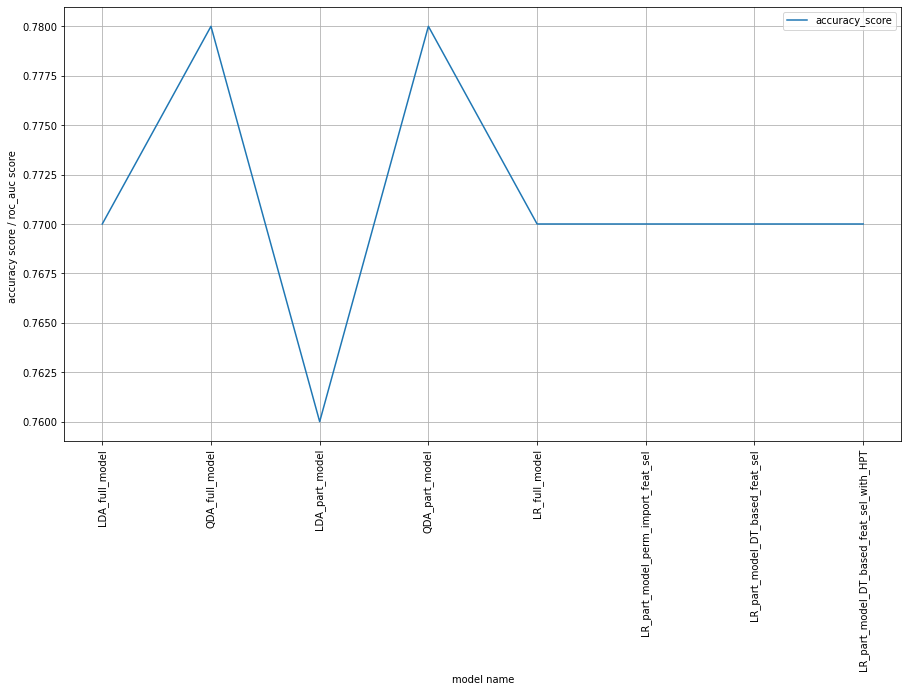

In [672]:
plt.figure(figsize=(15,8))
sns.lineplot(x=model_name,y=model_accuracy,label='accuracy_score')
# sns.lineplot(x=model_name,y=model_roc_auc_score,label='roc_auc')
plt.ylabel('accuracy score / roc_auc score ')
plt.xlabel('model name')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [673]:
# Taking QDA as our best model
# Features: instrumentalness	acousticness	loudness	energy	duration_ms	valence	danceability	liveness

In [498]:
import pickle
# now you can save it to a file
file = './Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(qda, f)

In [500]:
#test

In [501]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [674]:
test_data = [0.000054,0.002344,-8.897,0.3455,566667,0.6756,0.765,0.2755]

In [676]:
predictions  = k.predict([test_data])

In [677]:
predictions

array([0], dtype=int64)